In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

Let us find the rows and columns in our dataset

In [8]:
df.shape

(614, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Now let us find the mean and standard deviation and count using describe method

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now Let us Check If there is any Null Values Present Or not

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Removing Null values using Imputation Technique

There are some null values let use some desire operations and fill those values 

In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [14]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
df['LoanAmount'].mean()

146.41216216216216

In [20]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [21]:
df['Loan_Amount_Term'].mean()

342.0

In [22]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [23]:
df.Credit_History=df.Credit_History.fillna(df.Credit_History.mode()[0])

In [24]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [25]:
df.Gender=df.Gender.fillna(df.Gender.mode()[0])

In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now our data is free from Null Value  and let us split the data in to cat and num data

In [27]:
num_df=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_df.append(i)
print(num_df)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [28]:
num_df

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

The column Loan_Id has no relation to Prediction ill drop that column

In [29]:
df=df.drop('Loan_ID',axis=1)

In [30]:
cat_df=df.select_dtypes(include=np.object).columns

C:\Users\dell\AppData\Local\Temp/ipykernel_2188/4272529193.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_df=df.select_dtypes(include=np.object).columns


In [31]:
cat_df

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

# UNIVARIENT ANALYSIS

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-p

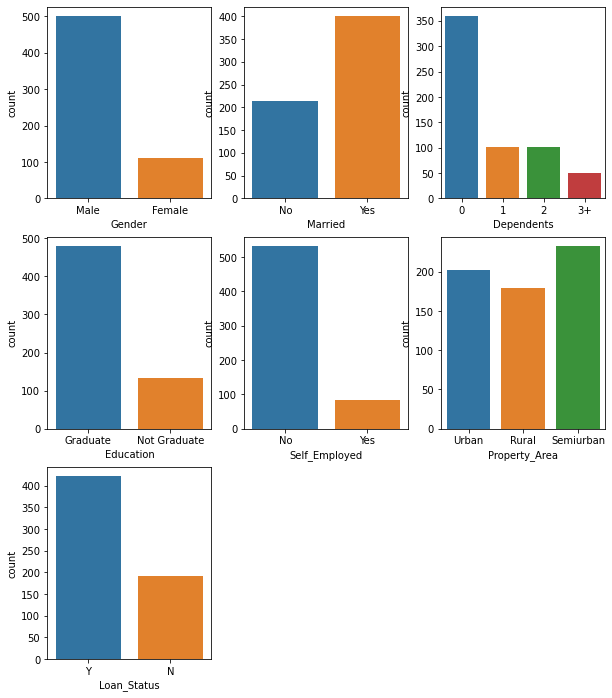

In [32]:
plt.subplots(figsize=(10,12))
plotnumber=1
for i in cat_df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i],data=df)
    plotnumber+=1
plt.show()

OBSERVATIONS:
Gender who applied Loans Are maximum of men

Most of the people applied for the loan are Graduates

Almost 70% of people applied for loan are married

Employed persons are the one who applied for the loans 

semiurban area peroples applies for loan most of the time followed by urban people

Most of the Status of Loan is Yes.Its imbalanced will balance when training our model


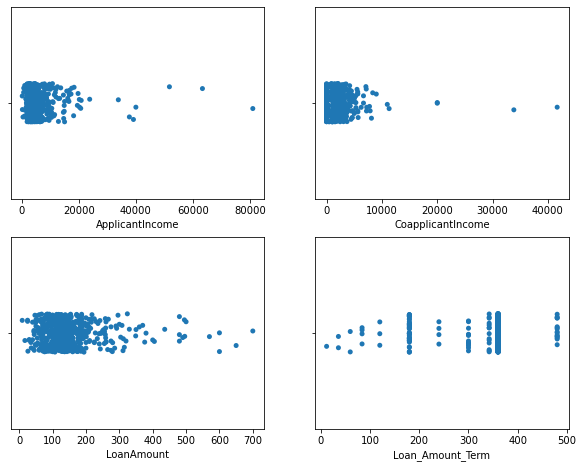

In [33]:
plt.subplots(figsize=(10,12))
plotnumber=1
for i in num_df:
    if plotnumber<=4:
        ax=plt.subplot(3,2,plotnumber)
        sns.stripplot(x=df[i])
    plotnumber+=1
plt.show()


OBSERVATIONS:
    The applicant income ranges below 20,000 are the one who app,ies for the loan
    
    The co_applicant salary is below 10,000
    
    The loan amount which is required for them are usually 1L to 3L
    
    the most preferable loan term is b/w 2 y,4y and 2y

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

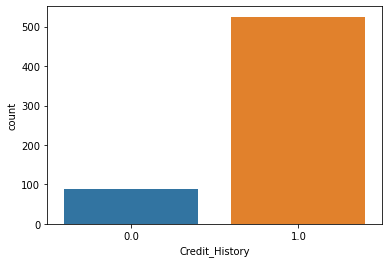

In [34]:
#As Credit_History is categorical will observe it individually
sns.countplot(df['Credit_History'],data=df)

Most have Credit History of 1

# BIVARIENT ANALYSIS

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

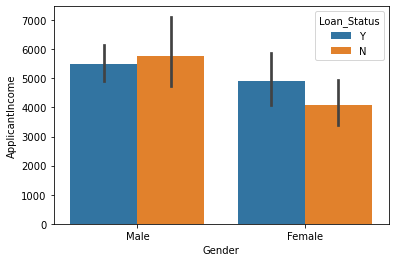

In [35]:
sns.barplot(x=df['Gender'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

We could observe that in male the sal lies on 5500 and for no it lies b/w 5600

for female the incole lies at 5000 and 4500 for no

<AxesSubplot:xlabel='Gender', ylabel='Credit_History'>

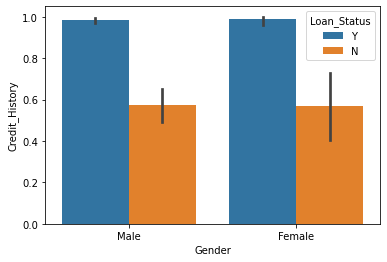

In [130]:
sns.barplot(x=df['Gender'],y=df['Credit_History'],hue=df['Loan_Status'])

The loan Approved equally for male and female who have credit history of 1

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

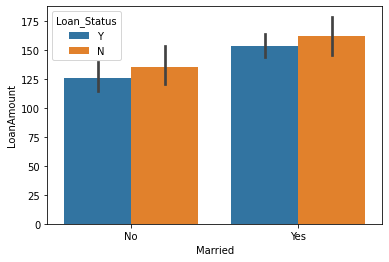

In [36]:
sns.barplot(x=df['Married'],y=df['LoanAmount'],hue=df['Loan_Status'])

Male get less rejection than female 
The avg loan applied by married  130 which is approved and umarried  is 150 which is approved
The avg loan applied by umarried is 130 and  abd 145 which is unapproved

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

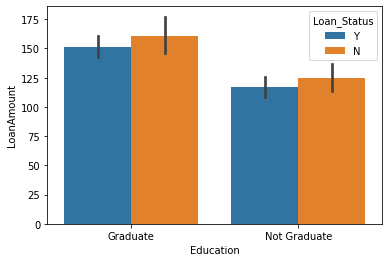

In [37]:
sns.barplot(x=df['Education'],y=df['LoanAmount'],hue=df['Loan_Status'])

Here the Graduate applied for a loan are approved and the avg loan amount is 150 and npis 155k
Here the Not Gradate are   usually applied below 110k and no are below 130 as avg


<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

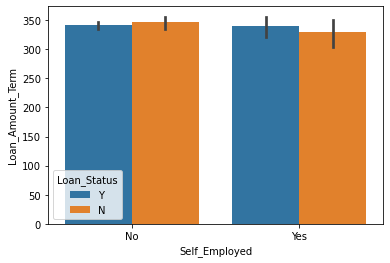

In [40]:
sns.barplot(x=df['Self_Employed'],y=df['Loan_Amount_Term'],hue=df['Loan_Status'])

The loan amount terms are usually 3y for the one who is self employed and and not a self employed one  

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

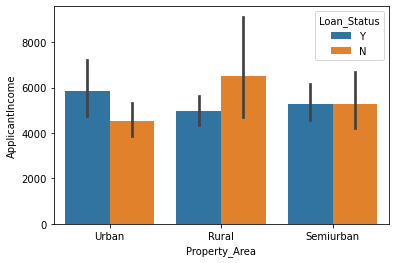

In [42]:
sns.barplot(x=df['Property_Area'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

The loan rejection in rural area is higher 

The urban area has high loan approal and the income is less tham 6000k

The semi urban has equal yes and no loan status

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

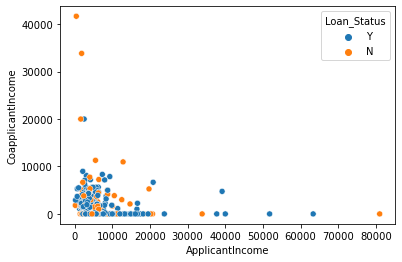

In [49]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status',data=df)

The co appicant income lies at 10000 and applicant income lies at 20000 for yes
we could observe that there are some outliers also present

# MUltivarient analysis

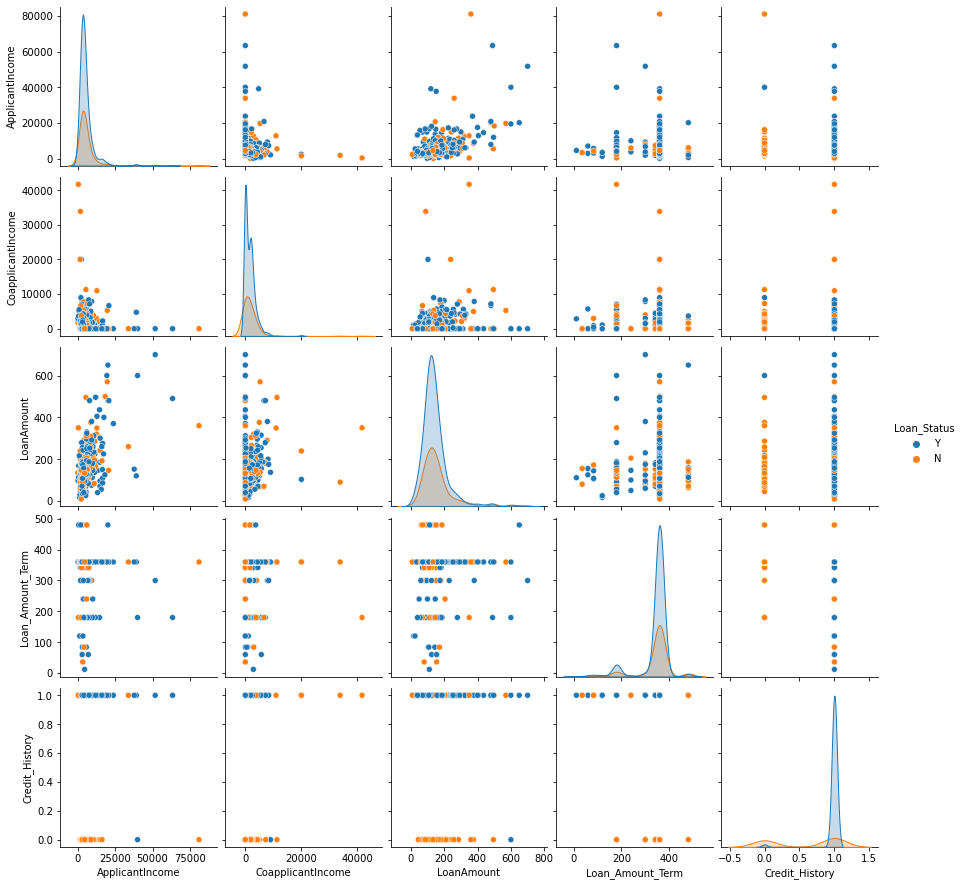

In [45]:
sns.pairplot(df,hue='Loan_Status')

we could clearly observe that the applicant income have lineae corr with loan amount,coapplicant income ,loan amount term

Also there ar some outliers present in the columns

# SKEWNESS HANDLING

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-p

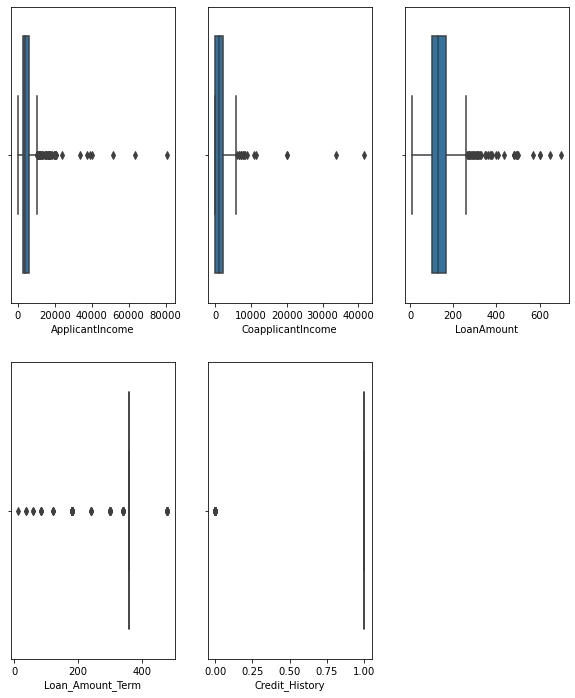

In [52]:
plt.subplots(figsize=(10,12))
plotnumber=1
for i in num_df:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[i],data=df)
    plotnumber+=1
plt.show()
        

# OUTLIERS REMOVING USING Z SCORE

In [127]:
features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [128]:
from scipy.stats import zscore

In [129]:
z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.000000,0.279851
1,0.134412,0.038732,0.219273,0.279851
2,0.393747,0.554487,0.957641,0.279851
3,0.462062,0.251980,0.314547,0.279851
4,0.097728,0.554487,0.064454,0.279851
...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851
610,0.212557,0.554487,1.267279,2.518655
611,0.437174,0.472404,1.269371,0.279851
612,0.357064,0.554487,0.483367,0.279851


In [130]:
new_df=df[(z<3).all(axis=1)]

In [131]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [132]:
df.shape

(614, 12)

In [133]:
new_df.shape

(577, 12)

In [134]:
(614-577)/614*100

6.026058631921824

we have almost 6 percent data loss

# SKEWNESS HANDLNG

In [135]:
new_df.skew()

C:\Users\dell\AppData\Local\Temp/ipykernel_2188/3313494185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
dtype: float64

Here the Loan Amount Term and credit history are catogorical 
Hence we could see that there are some skewness in other columns such as applicant income ,coapplicant income

In [136]:
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [137]:
#will use Yeo johnson method to handle this skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [138]:
new_df[skew] =pt.fit_transform(new_df[skew].values)
new_df[skew].head()

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.316078
1,0.234783,0.744117,-0.015871
2,-0.527201,-1.122446,-1.443112
3,-0.791972,0.895786,-0.169860
4,0.728848,-1.122446,0.221481


In [139]:
new_df.skew()

C:\Users\dell\AppData\Local\Temp/ipykernel_2188/3313494185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
dtype: float64

Now almost our skewness is removed 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

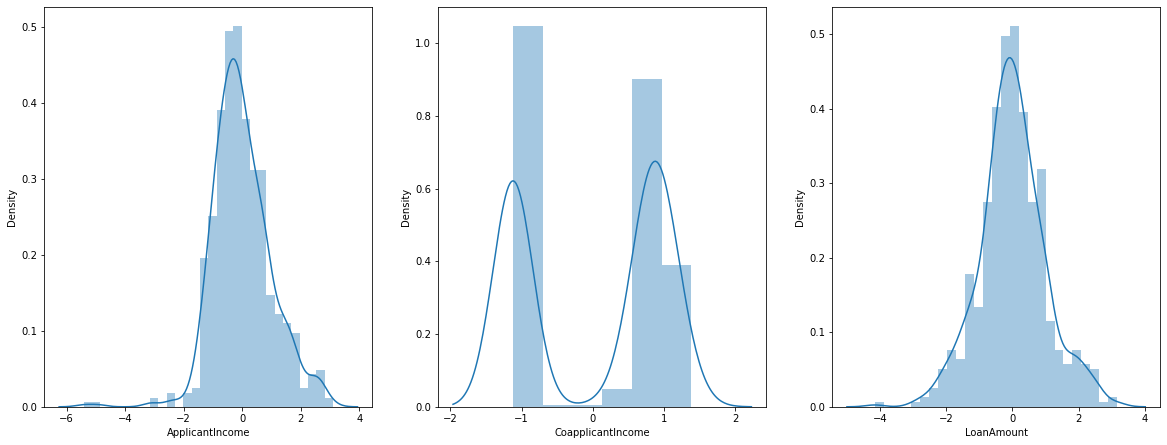

In [140]:
#Now Lets find the Distributon
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in new_df[skew]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],)
        plt.xlabel(column)
    plotnumber+=1
plt.show()

Now Our distribution looks bit Normal let us proceed Further

ENCODING CAT COLUMNS

In [97]:
new_df.select_dtypes(include=[np.object]).columns

C:\Users\dell\AppData\Local\Temp/ipykernel_2188/3966309629.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_df.select_dtypes(include=[np.object]).columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [141]:
cat=['Gender','Married','Dependents','Education','Self_Employed',
       'Property_Area','Loan_Status']


In [142]:
new_df[cat]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le=LabelEncoder()

In [145]:
new_df[cat]=new_df[cat].apply(le.fit_transform)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [172]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,-1.122446,0.316078,360.0,1.0,2,1
1,1,1,1,0,0,0.744117,-0.015871,360.0,1.0,0,0
2,1,1,0,0,1,-1.122446,-1.443112,360.0,1.0,2,1
3,1,1,0,1,0,0.895786,-0.169860,360.0,1.0,2,1
4,1,0,0,0,0,-1.122446,0.221481,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-1.122446,-1.301481,360.0,1.0,0,1
610,1,1,3,0,0,-1.122446,-2.321865,180.0,1.0,0,1
611,1,1,1,0,0,0.173344,1.838099,360.0,1.0,2,1
612,1,1,2,0,0,-1.122446,0.961555,360.0,1.0,2,1


now the catogorical datas are encoded with the values

# Now will check the corr with the target variable

<AxesSubplot:>

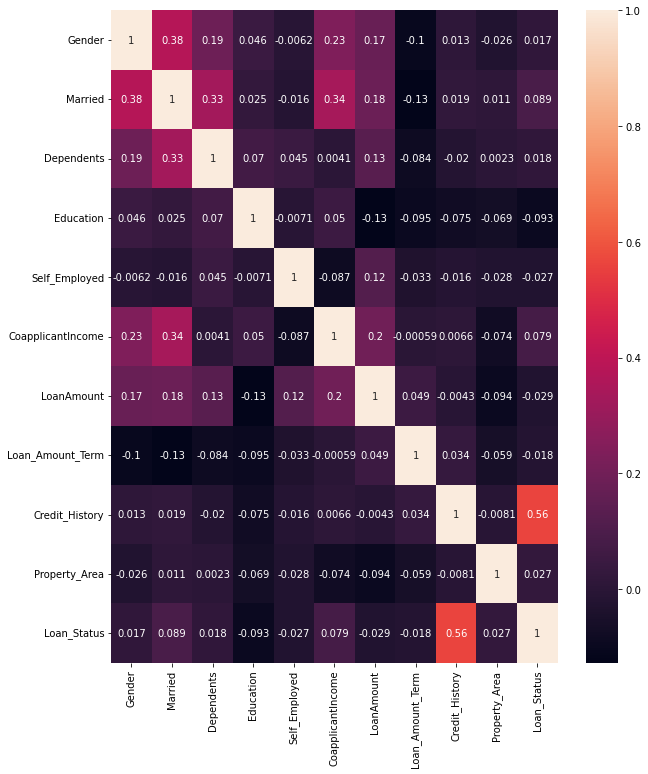

In [173]:
plt.subplots(figsize=(10,12))
sns.heatmap(new_df.corr(),annot=True)

The creditr history has a high corr with the target variable 

The loan amount,applicant income,loan amount term,self emploted and education have negative corr with the target variable

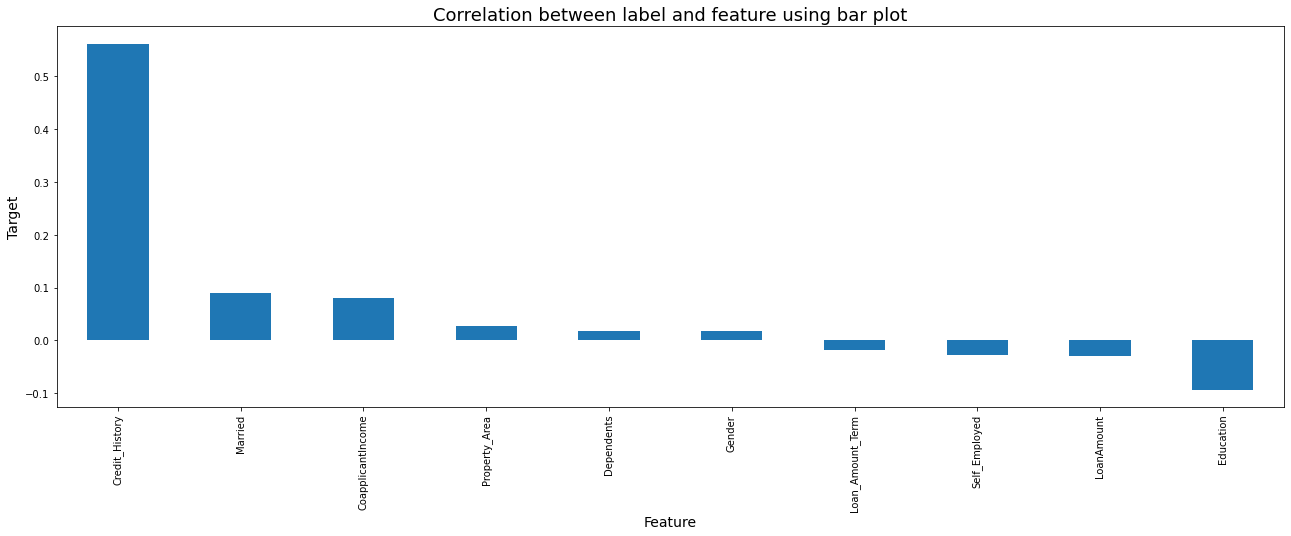

In [174]:
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between label and feature using bar plot", fontsize=18)
plt.show()

The Applicant income has less corr with the target so ill remove it from my data set

In [121]:
new_df=new_df.drop(['ApplicantIncome'],axis=1)

AttributeError: 'function' object has no attribute 'drop'

In [122]:
new_df()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [175]:
new_df=new_df.drop('ApplicantIncome',axis=1)

KeyError: "['ApplicantIncome'] not found in axis"

In [176]:
new_df.shape

(577, 11)

# Now lets split the feature and Label and trai our model

In [181]:
x=new_df.drop(['Loan_Status'],axis=1)
y=new_df['Loan_Status']

In [182]:
x.shape

(577, 10)

In [183]:
y.shape

(577,)

In [154]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaled=StandardScaler()

In [159]:
x_scaled=scaled.fit_transform(x)

# Checking our Target is balanced or not if not will balance using Oversampling

In [184]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Its not Balanced will use oversampling and balance it

In [185]:
from imblearn.over_sampling import SMOTE

In [186]:
sm=SMOTE()

In [187]:
x,y=sm.fit_resample(x,y)

In [188]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now our target variable is Balanced let us Proceed Further 

# Now Train the model

In [191]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

# MODELLING

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [197]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

# prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.7489539748953975
[[88 29]
 [31 91]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       117
           1       0.76      0.75      0.75       122

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239



In [199]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

# prediction
predRFC=RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8200836820083682
[[ 94  23]
 [ 20 102]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       117
           1       0.82      0.84      0.83       122

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



In [200]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7447698744769874
[[ 70  47]
 [ 14 108]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       117
           1       0.70      0.89      0.78       122

    accuracy                           0.74       239
   macro avg       0.77      0.74      0.74       239
weighted avg       0.76      0.74      0.74       239



C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
svc=SVC()
svc.fit(x_train,y_train)

# prediction
predsvc=svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.4895397489539749
[[117   0]
 [122   0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       117
           1       0.00      0.00      0.00       122

    accuracy                           0.49       239
   macro avg       0.24      0.50      0.33       239
weighted avg       0.24      0.49      0.32       239



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7447698744769874
[[94 23]
 [38 84]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.76       117
           1       0.79      0.69      0.73       122

    accuracy                           0.74       239
   macro avg       0.75      0.75      0.74       239
weighted avg       0.75      0.74      0.74       239



In [203]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.7824267782426778
[[ 81  36]
 [ 16 106]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       117
           1       0.75      0.87      0.80       122

    accuracy                           0.78       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.78      0.78       239



In [204]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# prediction
predABC=ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.7740585774058577
[[ 77  40]
 [ 14 108]]
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       117
           1       0.73      0.89      0.80       122

    accuracy                           0.77       239
   macro avg       0.79      0.77      0.77       239
weighted avg       0.79      0.77      0.77       239



In [205]:
NB = GaussianNB()
NB.fit(x_train,y_train)

# prediction
predNB=NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test, predNB))

0.7364016736401674
[[ 61  56]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       117
           1       0.67      0.94      0.78       122

    accuracy                           0.74       239
   macro avg       0.78      0.73      0.72       239
weighted avg       0.78      0.74      0.72       239



# CROSS_VAL SCORE:

In [207]:
from sklearn.model_selection import cross_val_score

In [209]:
#Decision Tree classifier
print(cross_val_score(DTC ,x,y,cv=5).mean())

0.7538443396226414


In [210]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC ,x,y,cv=5).mean())

0.8166430817610063


In [211]:
# cv score for Logistic Regression
print(cross_val_score(LR ,x,y,cv=5).mean())

0.7412814465408806


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [212]:
# cv score for Support Vector Classifier
print(cross_val_score(svc ,x,y,cv=5).mean())

0.5050157232704402


In [213]:
# cv score for KNN Classifier
print(cross_val_score(knn ,x,y,cv=5).mean())

0.7500235849056605


In [214]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB ,x,y,cv=5).mean())

0.7827358490566038


In [215]:
# cv score for Ada Boost Classifier
print(cross_val_score(ABC ,x,y,cv=5).mean())

0.745055031446541


In [216]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB ,x,y,cv=5).mean())

0.7425471698113209


we have different models yet i choose to go with knn for hyper parameter tuning

# Hyper_parameter_tuning

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
parameters={'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance'],
             'p':[1,2,3,4,5]}

In [222]:
gcv=GridSearchCV(knn,parameters,cv=10)

In [223]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [224]:
gcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [236]:
final=KNN(algorithm='auto',leaf_size=10,n_neighbors=3,p=2,weights='distance')

In [237]:
final.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=3, weights='distance')

In [238]:
#prediction
y_pred=final.predict(x_test)

In [239]:
#accuracyScore
acc=accuracy_score(y_test,y_pred)
acc*100

71.96652719665272

Hence Due to some noise at intial state the accuracy is &5 percent where after fine Tuning the best result for our model is 72 percent

# Plotting ROC CURVE FOR KNN

In [241]:
from sklearn.metrics import plot_roc_curve

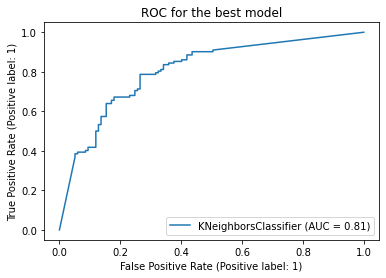

In [246]:
plot_roc_curve(final, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving The Model

In [254]:
import pickle
filename='Loan prediction'
pickle.dump('rd',open(filename,'wb'))